# Iris Classification Models
### Author: Bryce Freshcorn (bcf4kv@virginia.edu)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('bezdekIris.data', header=None, names=['sepal_length', 'sepal_width',\
                                                          'petal_length', 'petal_width',\
                                                          'class'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Exploratory Data Analysis (EDA)

In [3]:
data.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


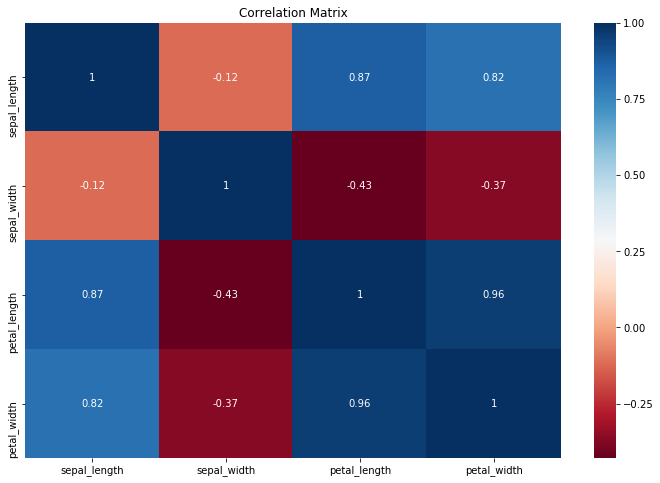

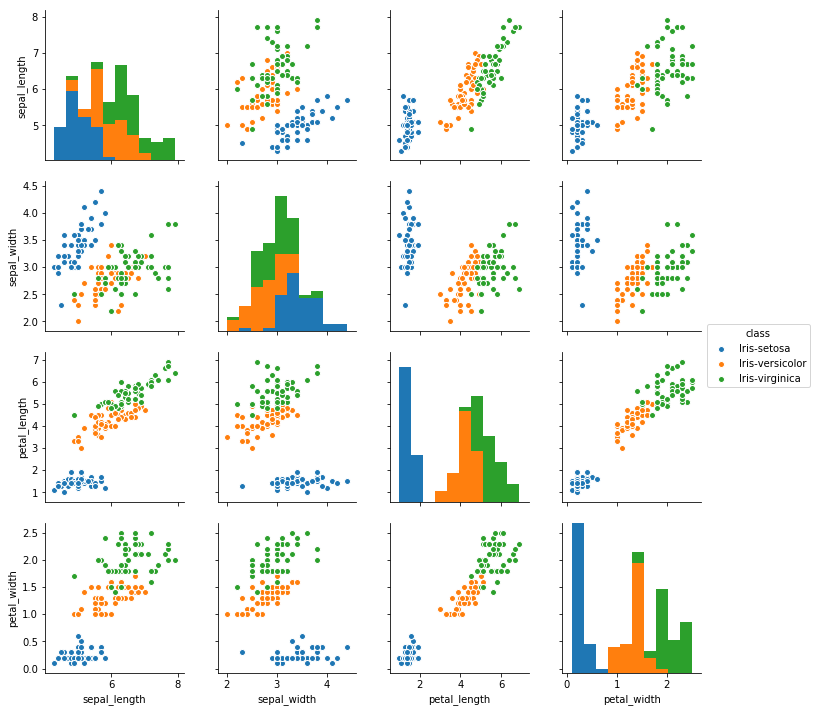

In [5]:
plt.figure(figsize=(12,8))
ax1 = sns.heatmap(data.corr(), annot=True, cmap='RdBu')
ax1.set_title('Correlation Matrix')
sns.pairplot(data, hue='class')

In [6]:
param_grids = {'svc': {'C': np.logspace(1, 50, 10),
                       'degree': [2, 4, 6]},
               'bagged_trees': {'n_estimators': [8, 10, 15, 20]},
               'knn': {'n_neighbors': [4, 5, 6, 7, 8],\
                       'weights': ('uniform', 'distance')},
               'gradient': {'learning_rate': np.linspace(0.05, 0.2, 6),
                            'n_estimators': [100, 125, 150, 175, 200],
                            'max_depth': [2, 4, 6]},
               'random_forest': {'n_estimators': [8, 10, 15, 20],
                                 'max_depth': [2, 4, 6, 8, 10]}
              }

## Create callable GridSearchCV objects for different model candidates

In [7]:
svc_model = SVC(kernel='poly', random_state=123)
svc_clf = GridSearchCV(svc_model, param_grids['svc'], scoring='f1_weighted', cv=5, verbose=1)

bagged_trees_model = BaggingClassifier(random_state=123)
bagged_trees_clf = GridSearchCV(bagged_trees_model, param_grids['bagged_trees'], scoring='f1_weighted', cv=5, verbose=1)

knn_model = KNeighborsClassifier()
knn_clf = GridSearchCV(knn_model, param_grids['knn'], scoring='f1_weighted', cv=5, verbose=1)

gradient_model = GradientBoostingClassifier(random_state=123)
gradient_clf = GridSearchCV(gradient_model, param_grids['gradient'], scoring='f1_weighted', cv=5, verbose=1)

random_forest_model = RandomForestClassifier(random_state=123)
random_forest_clf = GridSearchCV(random_forest_model, param_grids['random_forest'], scoring='f1_weighted', cv=5, verbose=1)
print('Random Forest model grid search completed.\n')

Random Forest model grid search completed.



## Clean up dataframe to provide features table and target series

In [8]:
target = data['class']
features = data.drop('class', axis=1)

## Create learning curves based on the hyperparameter values defined in the GridSearchCV objects

In [9]:
set_sizes = np.linspace(0.3, 1, 5)
print('Starting grid search for SVC...')
svc_lc = learning_curve(svc_clf, X=features, y=target, train_sizes=set_sizes, scoring='f1_weighted',\
                        shuffle=True, verbose=1)
print('SVC grid search completed.\n')

print('Starting grid search for Bagged Trees model...')
bagged_trees_lc = learning_curve(bagged_trees_clf, X=features, y=target, train_sizes=set_sizes,\
                                 scoring='f1_weighted', shuffle=True, verbose=1)
print('Bagged Trees grid search completed.\n')

print('Starting KNN search for KNN...')
knn_lc = learning_curve(knn_clf, X=features, y=target, train_sizes=set_sizes, scoring='f1_weighted',\
                        shuffle=True, verbose=1)
print('KNN grid search completed.\n')

print('Starting grid search for Gradient Boosting model...')
gradient_lc = learning_curve(gradient_clf, X=features, y=target, train_sizes=set_sizes,\
                             scoring='f1_weighted', shuffle=True, verbose=1)
print('Gradient Boosting model grid search completed.\n')

print('Starting grid search for Random Forest model...')
random_forest_lc = learning_curve(random_forest_clf, X=features, y=target, train_sizes=set_sizes,\
                                  scoring='f1_weighted', shuffle=True, verbose=1)
print('Random Forest model grid search completed.\n')

Starting grid search for SVC...
[learning_curve] Training set sizes: [29 47 64 81 99]
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.0s finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.8s finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.2s finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.7s finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.8s finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   13.9s finished
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   27.6s finished
/Users/userBryce/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/userBryce/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC grid search completed.

Starting grid search for Bagged Trees model...
[learning_curve] Training set sizes: [29 47 64 81 99]
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Users/userBryce/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/userBryce/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    7.3s finished
/Users/userBryce/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/userBryce/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/userBryce/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Bagged Trees grid search completed.

Starting KNN search for KNN...
[learning_curve] Training set sizes: [29 47 64 81 99]
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
/Users/userBryce/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/userBryce/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/userBryce/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/userBryce/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/userBryce/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    3.5s finished


KNN grid search completed.

Starting grid search for Gradient Boosting model...
[learning_curve] Training set sizes: [29 47 64 81 99]
Fitting 5 folds for each of 90 candidates, totalling 450 fits


/Users/userBryce/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/userBryce/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/userBryce/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/userBryce/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.4min finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.4min finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.5min finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.5min finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.2min finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.3min finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.3min finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.3min finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.4min finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.3min finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.3min finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.3min finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.4min finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 20.4min finished


Gradient Boosting model grid search completed.

Starting grid search for Random Forest model...
[learning_curve] Training set sizes: [29 47 64 81 99]
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/userBryce/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/userBryce/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/userBryce/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/userBryce/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Random Forest model grid search completed.



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   32.9s finished


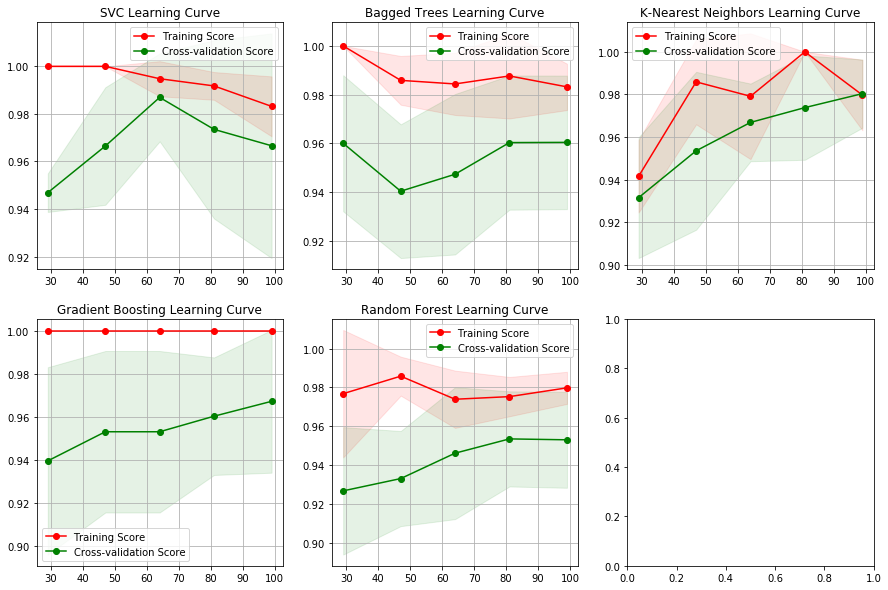

In [10]:
model_names = ['SVC', 'Bagged Trees', 'K-Nearest Neighbors','Gradient Boosting', 'Random Forest']
titles = ['{} Learning Curve'.format(name) for name in model_names]

def plot_learning_curve(ax, title, model_lc):
    train_sizes = model_lc[0]
    
    mean_train_scores = np.mean(model_lc[1], axis=1)
    std_train_scores = np.std(model_lc[1], axis=1)
    top_train_scores = mean_train_scores + std_train_scores
    bottom_train_scores = mean_train_scores - std_train_scores
    
    mean_test_scores = np.mean(model_lc[2], axis=1)
    std_test_scores = np.std(model_lc[2], axis=1)
    top_test_scores = mean_test_scores + std_test_scores
    bottom_test_scores = mean_test_scores - std_test_scores
    
    ax.grid()
    ax.set_title(title)
    ax.set_ylabel = 'F1-Weighted Score'
    ax.set_xlabel = 'Training Examples'
    ax.plot(train_sizes, mean_train_scores, 'o-', color='r', label='Training Score')
    ax.plot(train_sizes, mean_test_scores, 'o-', color='g', label='Cross-validation Score')
    ax.fill_between(train_sizes, bottom_train_scores, top_train_scores, alpha=0.1, color='r')
    ax.fill_between(train_sizes, bottom_test_scores, top_test_scores, alpha=0.1, color='g')
    ax.legend(loc='best')
    return ax

figure, axes = plt.subplots(2, 3, figsize=(15, 10))
plot_learning_curve(axes[0,0], titles[0], svc_lc)
plot_learning_curve(axes[0,1], titles[1], bagged_trees_lc)
plot_learning_curve(axes[0,2], titles[2], knn_lc)
plot_learning_curve(axes[1,0], titles[3], gradient_lc)
plot_learning_curve(axes[1,1], titles[4], random_forest_lc)

## Split training and testing data sets based on input from learning curves

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, test_size=0.2, random_state=123)

## Establish baseline model performance based on "dumb" guesses

In [12]:
dummy_model_predictions = DummyClassifier(random_state=123).fit(X_train, y_train).predict(X_test)
dummy_f1_score = f1_score(y_test, dummy_model_predictions, average='weighted')
print('-----Dummy Model Confusion Matrix-----\n{}\n\n'.format(confusion_matrix(y_test, dummy_model_predictions)))
print('-----Dummy Model Classification Report-----\n{}'.format(classification_report(y_test, dummy_model_predictions)))

-----Dummy Model Confusion Matrix-----
[[2 6 5]
 [3 2 1]
 [1 5 5]]


-----Dummy Model Classification Report-----
                 precision    recall  f1-score   support

    Iris-setosa       0.33      0.15      0.21        13
Iris-versicolor       0.15      0.33      0.21         6
 Iris-virginica       0.45      0.45      0.45        11

    avg / total       0.34      0.30      0.30        30



## Selected KNN (in this simple case) given data characteristics and learning curve performance estimate

In [13]:
knn_clf.fit(X_train, y_train)
print('----Best Model Hyperparameters----\n{}'.format(knn_clf.best_estimator_))
print('SCORE: {}'.format(knn_clf.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
----Best Model Hyperparameters----
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='distance')
SCORE: 0.9833333333333333


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


In [14]:
test_predictions = knn_clf.predict(X_test)
test_f1_score = f1_score(y_test, test_predictions, average='weighted')
print('KNN F1-Score: {}'.format(test_f1_score))
print('Dummy Classifier F1-Score: {}'.format(dummy_f1_score))
print('KNN model performance is {}x better than the "dumb" classifier.'.format(round(test_f1_score / dummy_f1_score, 4)))

KNN F1-Score: 0.9658761528326745
Dummy Classifier F1-Score: 0.3
KNN model performance is 3.2196x better than the "dumb" classifier.
